In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [38]:
# Load the dataset
file_path = r"C:\Users\Alpana\Desktop\study\internship\task 5 new\US_Accidents_March23_sampled_500k.csv"
df = pd.read_csv(file_path)


In [39]:

# Display the header to understand the columns
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2047758,Source2,2,2019-06-12 10:10:56,2019-06-12 10:55:58,30.641211,-91.153481,NaN,NaN,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
1,A-4694324,Source1,2,2022-12-03 23:37:14.000000000,2022-12-04 01:56:53.000000000,38.990562,-77.399070,38.990037,-77.398282,0.056,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-5006183,Source1,2,2022-08-20 13:13:00.000000000,2022-08-20 15:22:45.000000000,34.661189,-120.492822,34.661189,-120.492442,0.022,...,False,False,False,False,True,False,Day,Day,Day,Day
3,A-4237356,Source1,2,2022-02-21 17:43:04,2022-02-21 19:43:23,43.680592,-92.993317,43.680574,-92.972223,1.054,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-6690583,Source1,2,2020-12-04 01:46:00,2020-12-04 04:13:09,35.395484,-118.985176,35.395476,-118.985995,0.046,...,False,False,False,False,False,False,Night,Night,Night,Night



# Data Cleaning and Preprocessing


In [40]:

# Convert 'Start_Time' and 'End_Time' to datetime format
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')


In [41]:

# Drop rows with missing 'Start_Time' or 'End_Time'
df = df.dropna(subset=['Start_Time', 'End_Time'])

In [42]:

# Extract hour of day from 'Start_Time'
df['Hour'] = df['Start_Time'].dt.hour

In [43]:
# Handle missing values in 'Temperature(F)' by filling with mean
df['Temperature(F)'].fillna(df['Temperature(F)'].mean(), inplace=True)

In [44]:
# Fill missing categorical values in 'Weather_Condition' with 'Unknown'
df['Weather_Condition'].fillna('Unknown', inplace=True)

# Feature Engineering

In [45]:
# Extract day of week and month from 'Start_Time'
df['DayOfWeek'] = df['Start_Time'].dt.day_name()
df['Month'] = df['Start_Time'].dt.month


# Filtering Data

In [46]:
# Filter accidents with severity level 3 (considered severe)
severity_3_accidents = df[df['Severity'] == 3]


C:\Users\Alpana\AppData\Local\Temp\ipykernel_36576\1612560610.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df, palette='viridis')


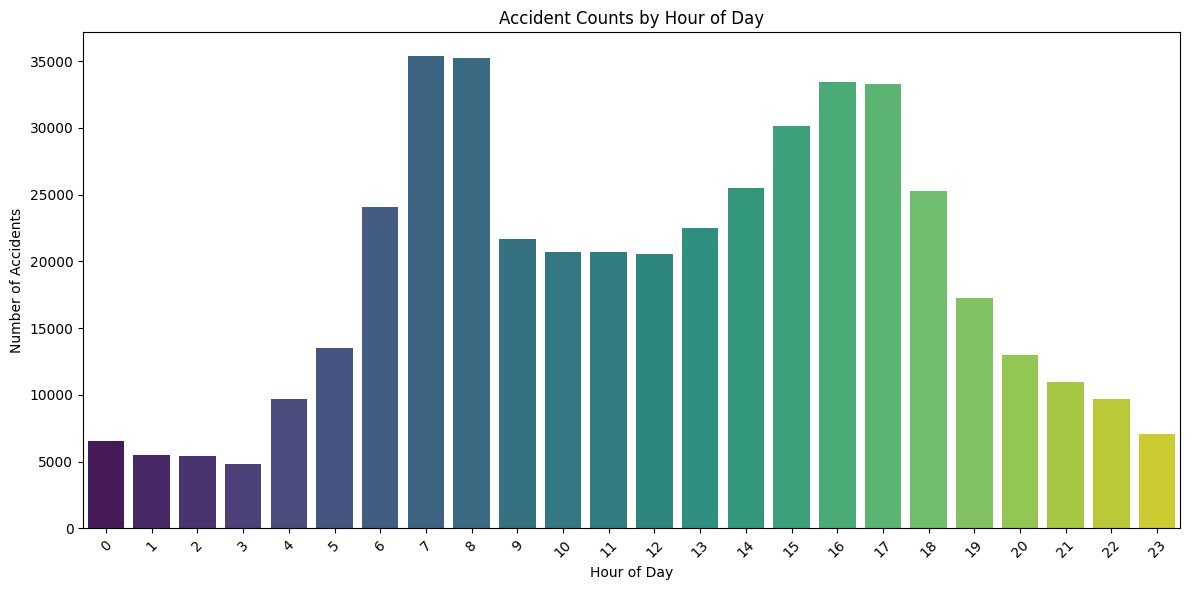

In [47]:
# Plotting accident counts by hour of day
plt.figure(figsize=(12,6))
sns.countplot(x='Hour', data=df, palette='viridis')
plt.title('Accident Counts by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Alpana\AppData\Local\Temp\ipykernel_36576\3189670267.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Weather_Condition', data=df, palette='viridis', order=df['Weather_Condition'].value_counts().iloc[:10].index)


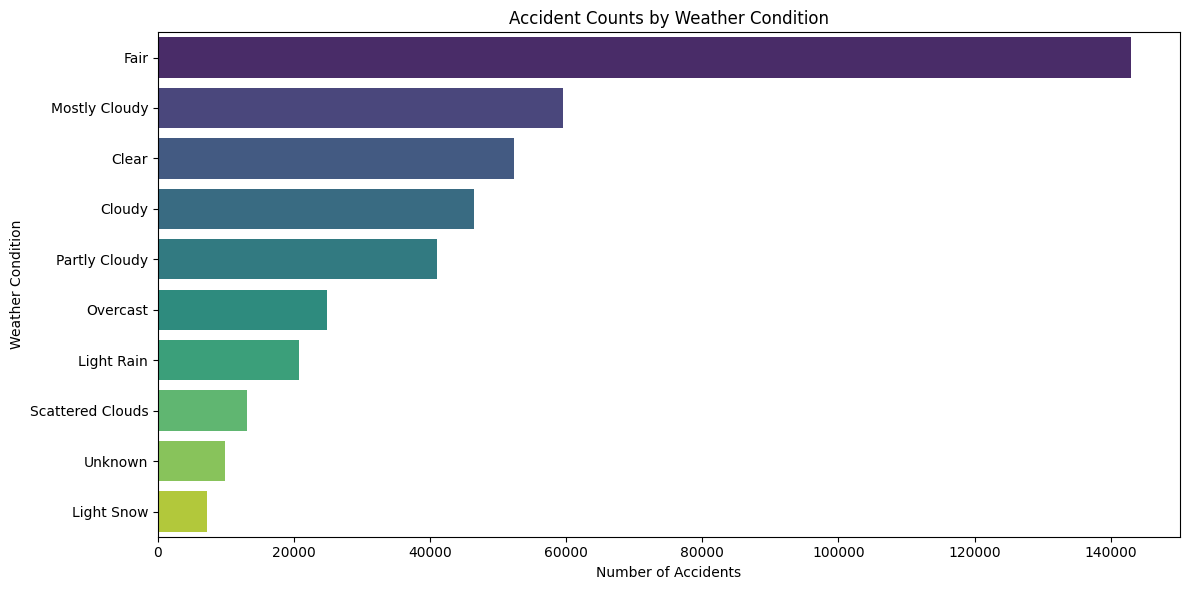

In [48]:
# Plotting accident counts by weather condition
plt.figure(figsize=(12,6))
sns.countplot(y='Weather_Condition', data=df, palette='viridis', order=df['Weather_Condition'].value_counts().iloc[:10].index)
plt.title('Accident Counts by Weather Condition')
plt.xlabel('Number of Accidents')
plt.ylabel('Weather Condition')
plt.tight_layout()
plt.show()

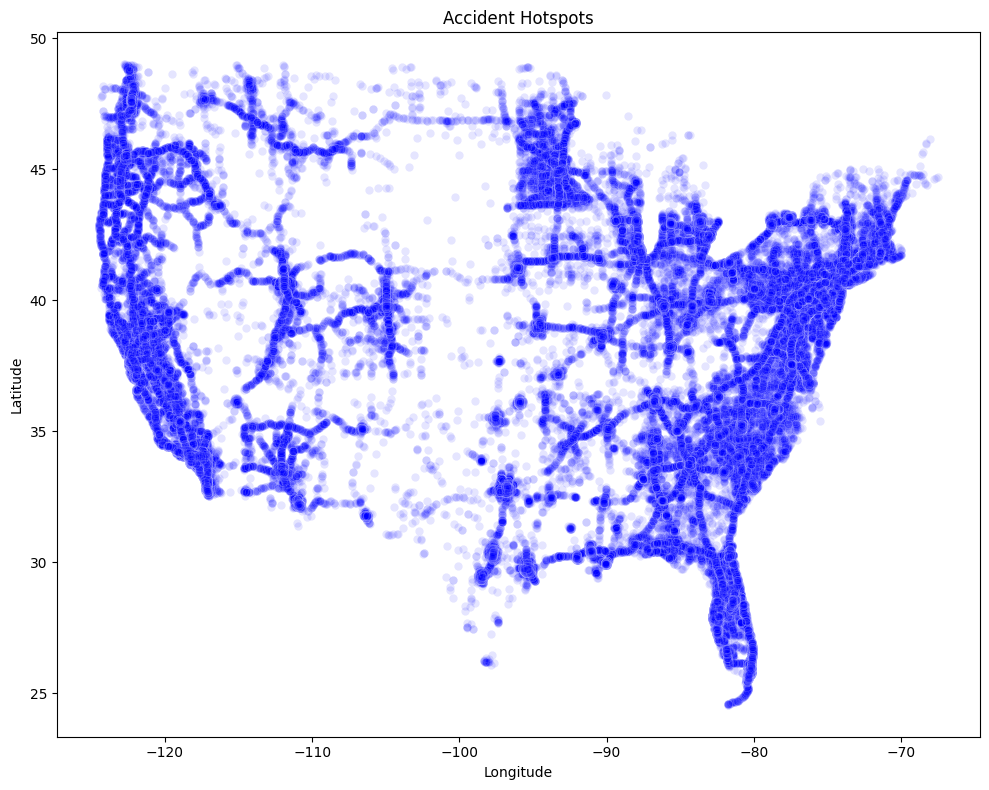

In [49]:
# Plotting accident hotspots (latitude vs longitude)
plt.figure(figsize=(10,8))
sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df, alpha=0.1, color='b')
plt.title('Accident Hotspots')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()

C:\Users\Alpana\AppData\Local\Temp\ipykernel_36576\1614172424.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DayOfWeek', data=df, palette='viridis', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])


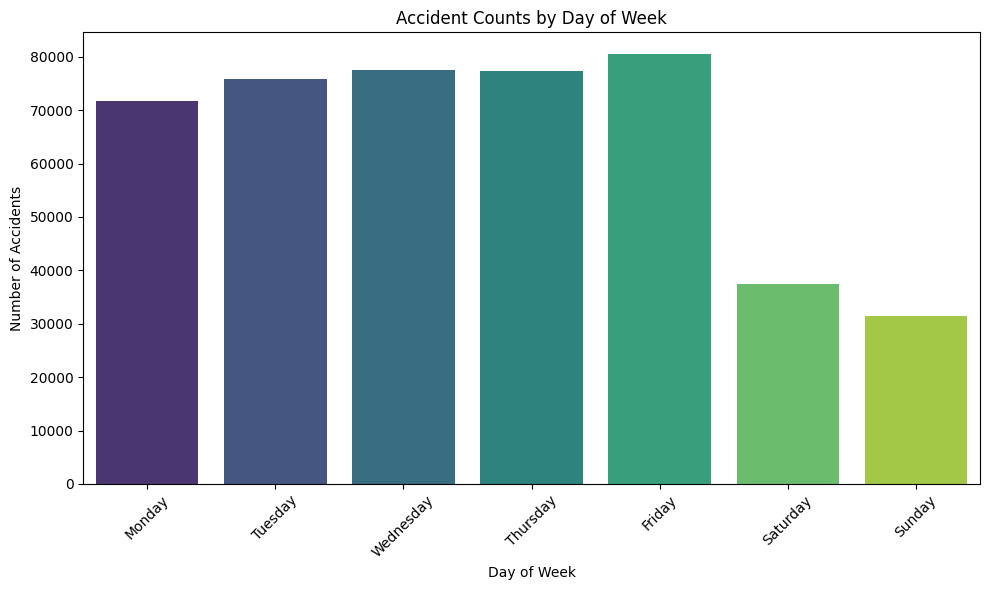

In [50]:
# Plotting accident counts by day of week
plt.figure(figsize=(10,6))
sns.countplot(x='DayOfWeek', data=df, palette='viridis', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Accident Counts by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Alpana\AppData\Local\Temp\ipykernel_36576\630851054.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month', data=df, palette='viridis')


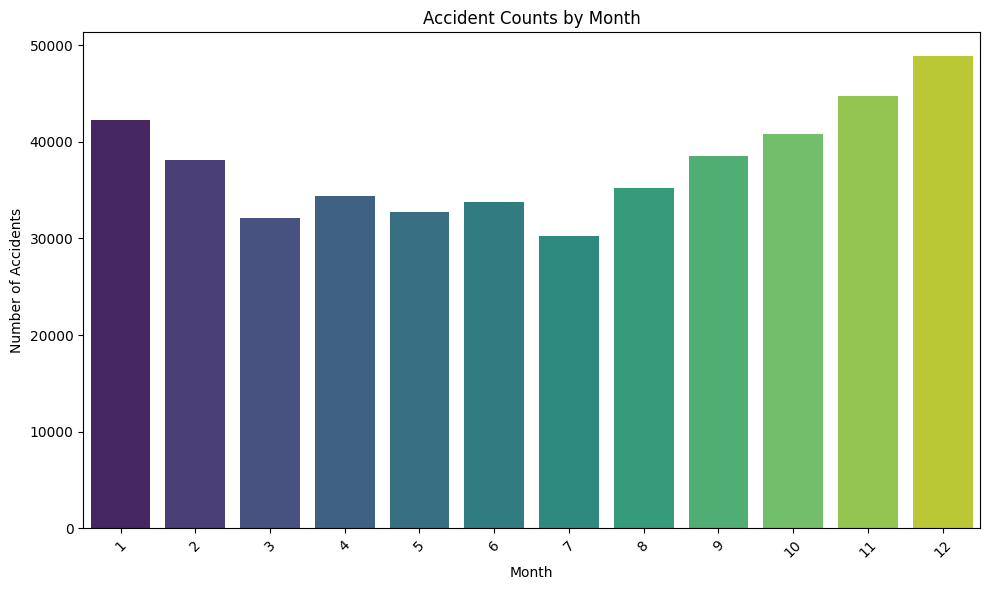

In [51]:
# Plotting accident counts by month
plt.figure(figsize=(10,6))
sns.countplot(x='Month', data=df, palette='viridis')
plt.title('Accident Counts by Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

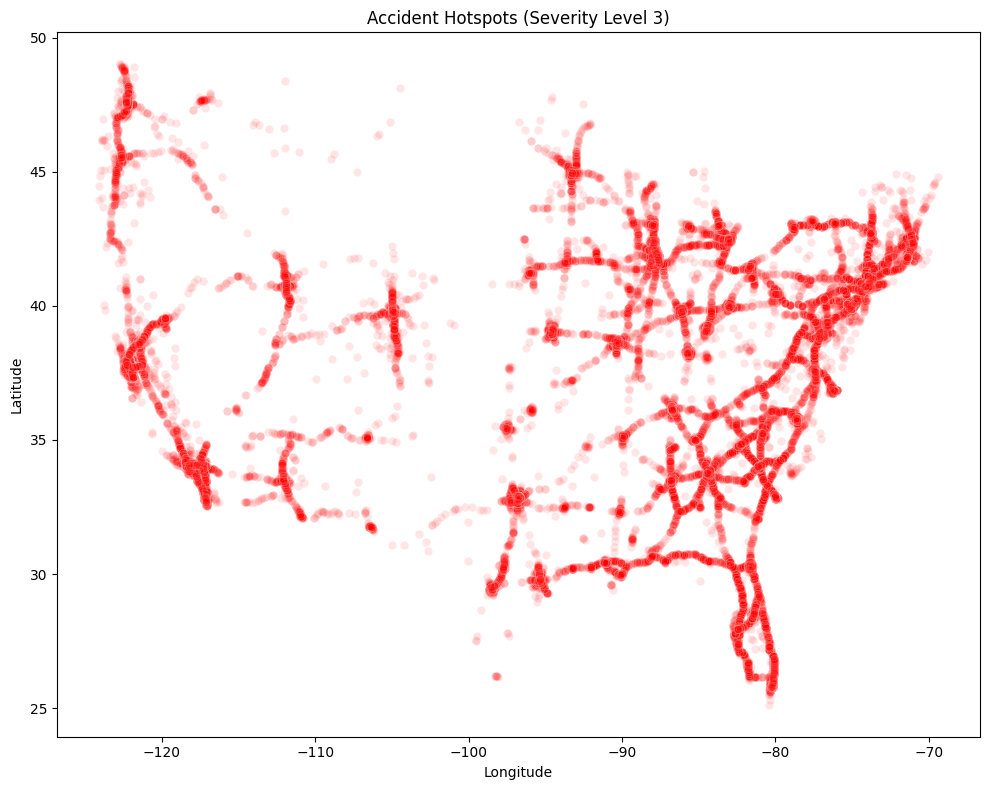

In [52]:
# Plotting accident hotspots (severity level 3)
plt.figure(figsize=(10,8))
sns.scatterplot(x='Start_Lng', y='Start_Lat', data=severity_3_accidents, alpha=0.1, color='r')
plt.title('Accident Hotspots (Severity Level 3)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()
